In [1]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
# Open and explore data

legdp_data = pd.read_csv("all_data.csv")
legdp_data.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [3]:
# Further explore data

print(legdp_data.info())
print(legdp_data.Country.value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB
None
Chile                       16
China                       16
Germany                     16
Mexico                      16
United States of America    16
Zimbabwe                    16
Name: Country, dtype: int64


In [4]:
# Initial summary statistics values

print(legdp_data.describe(include = "all"))

       Country         Year  Life expectancy at birth (years)           GDP
count       96    96.000000                         96.000000  9.600000e+01
unique       6          NaN                               NaN           NaN
top      Chile          NaN                               NaN           NaN
freq        16          NaN                               NaN           NaN
mean       NaN  2007.500000                         72.789583  3.880499e+12
std        NaN     4.633971                         10.672882  5.197561e+12
min        NaN  2000.000000                         44.300000  4.415703e+09
25%        NaN  2003.750000                         74.475000  1.733018e+11
50%        NaN  2007.500000                         76.750000  1.280220e+12
75%        NaN  2011.250000                         78.900000  4.067510e+12
max        NaN  2015.000000                         81.000000  1.810000e+13


In [5]:
# Separate data by year

data_2000 = legdp_data[legdp_data["Year"] == 2000]
data_2001 = legdp_data[legdp_data["Year"] == 2001]
data_2002 = legdp_data[legdp_data["Year"] == 2002]
data_2003 = legdp_data[legdp_data["Year"] == 2003]
data_2004 = legdp_data[legdp_data["Year"] == 2004]
data_2005 = legdp_data[legdp_data["Year"] == 2005]
data_2006 = legdp_data[legdp_data["Year"] == 2006]
data_2007 = legdp_data[legdp_data["Year"] == 2007]
data_2008 = legdp_data[legdp_data["Year"] == 2008]
data_2009 = legdp_data[legdp_data["Year"] == 2009]
data_2010 = legdp_data[legdp_data["Year"] == 2010]
data_2011 = legdp_data[legdp_data["Year"] == 2011]
data_2012 = legdp_data[legdp_data["Year"] == 2012]
data_2013 = legdp_data[legdp_data["Year"] == 2013]
data_2014 = legdp_data[legdp_data["Year"] == 2014]
data_2015 = legdp_data[legdp_data["Year"] == 2015]

In [6]:
# Separate data by country

data_chile = legdp_data[legdp_data["Country"] == "Chile"]
data_china = legdp_data[legdp_data["Country"] == "China"]
data_germany = legdp_data[legdp_data["Country"] == "Germany"]
data_mexico = legdp_data[legdp_data["Country"] == "Mexico"]
data_usa = legdp_data[legdp_data["Country"] == "United States of America"]
data_zimbabwe = legdp_data[legdp_data["Country"] == "Zimbabwe"]

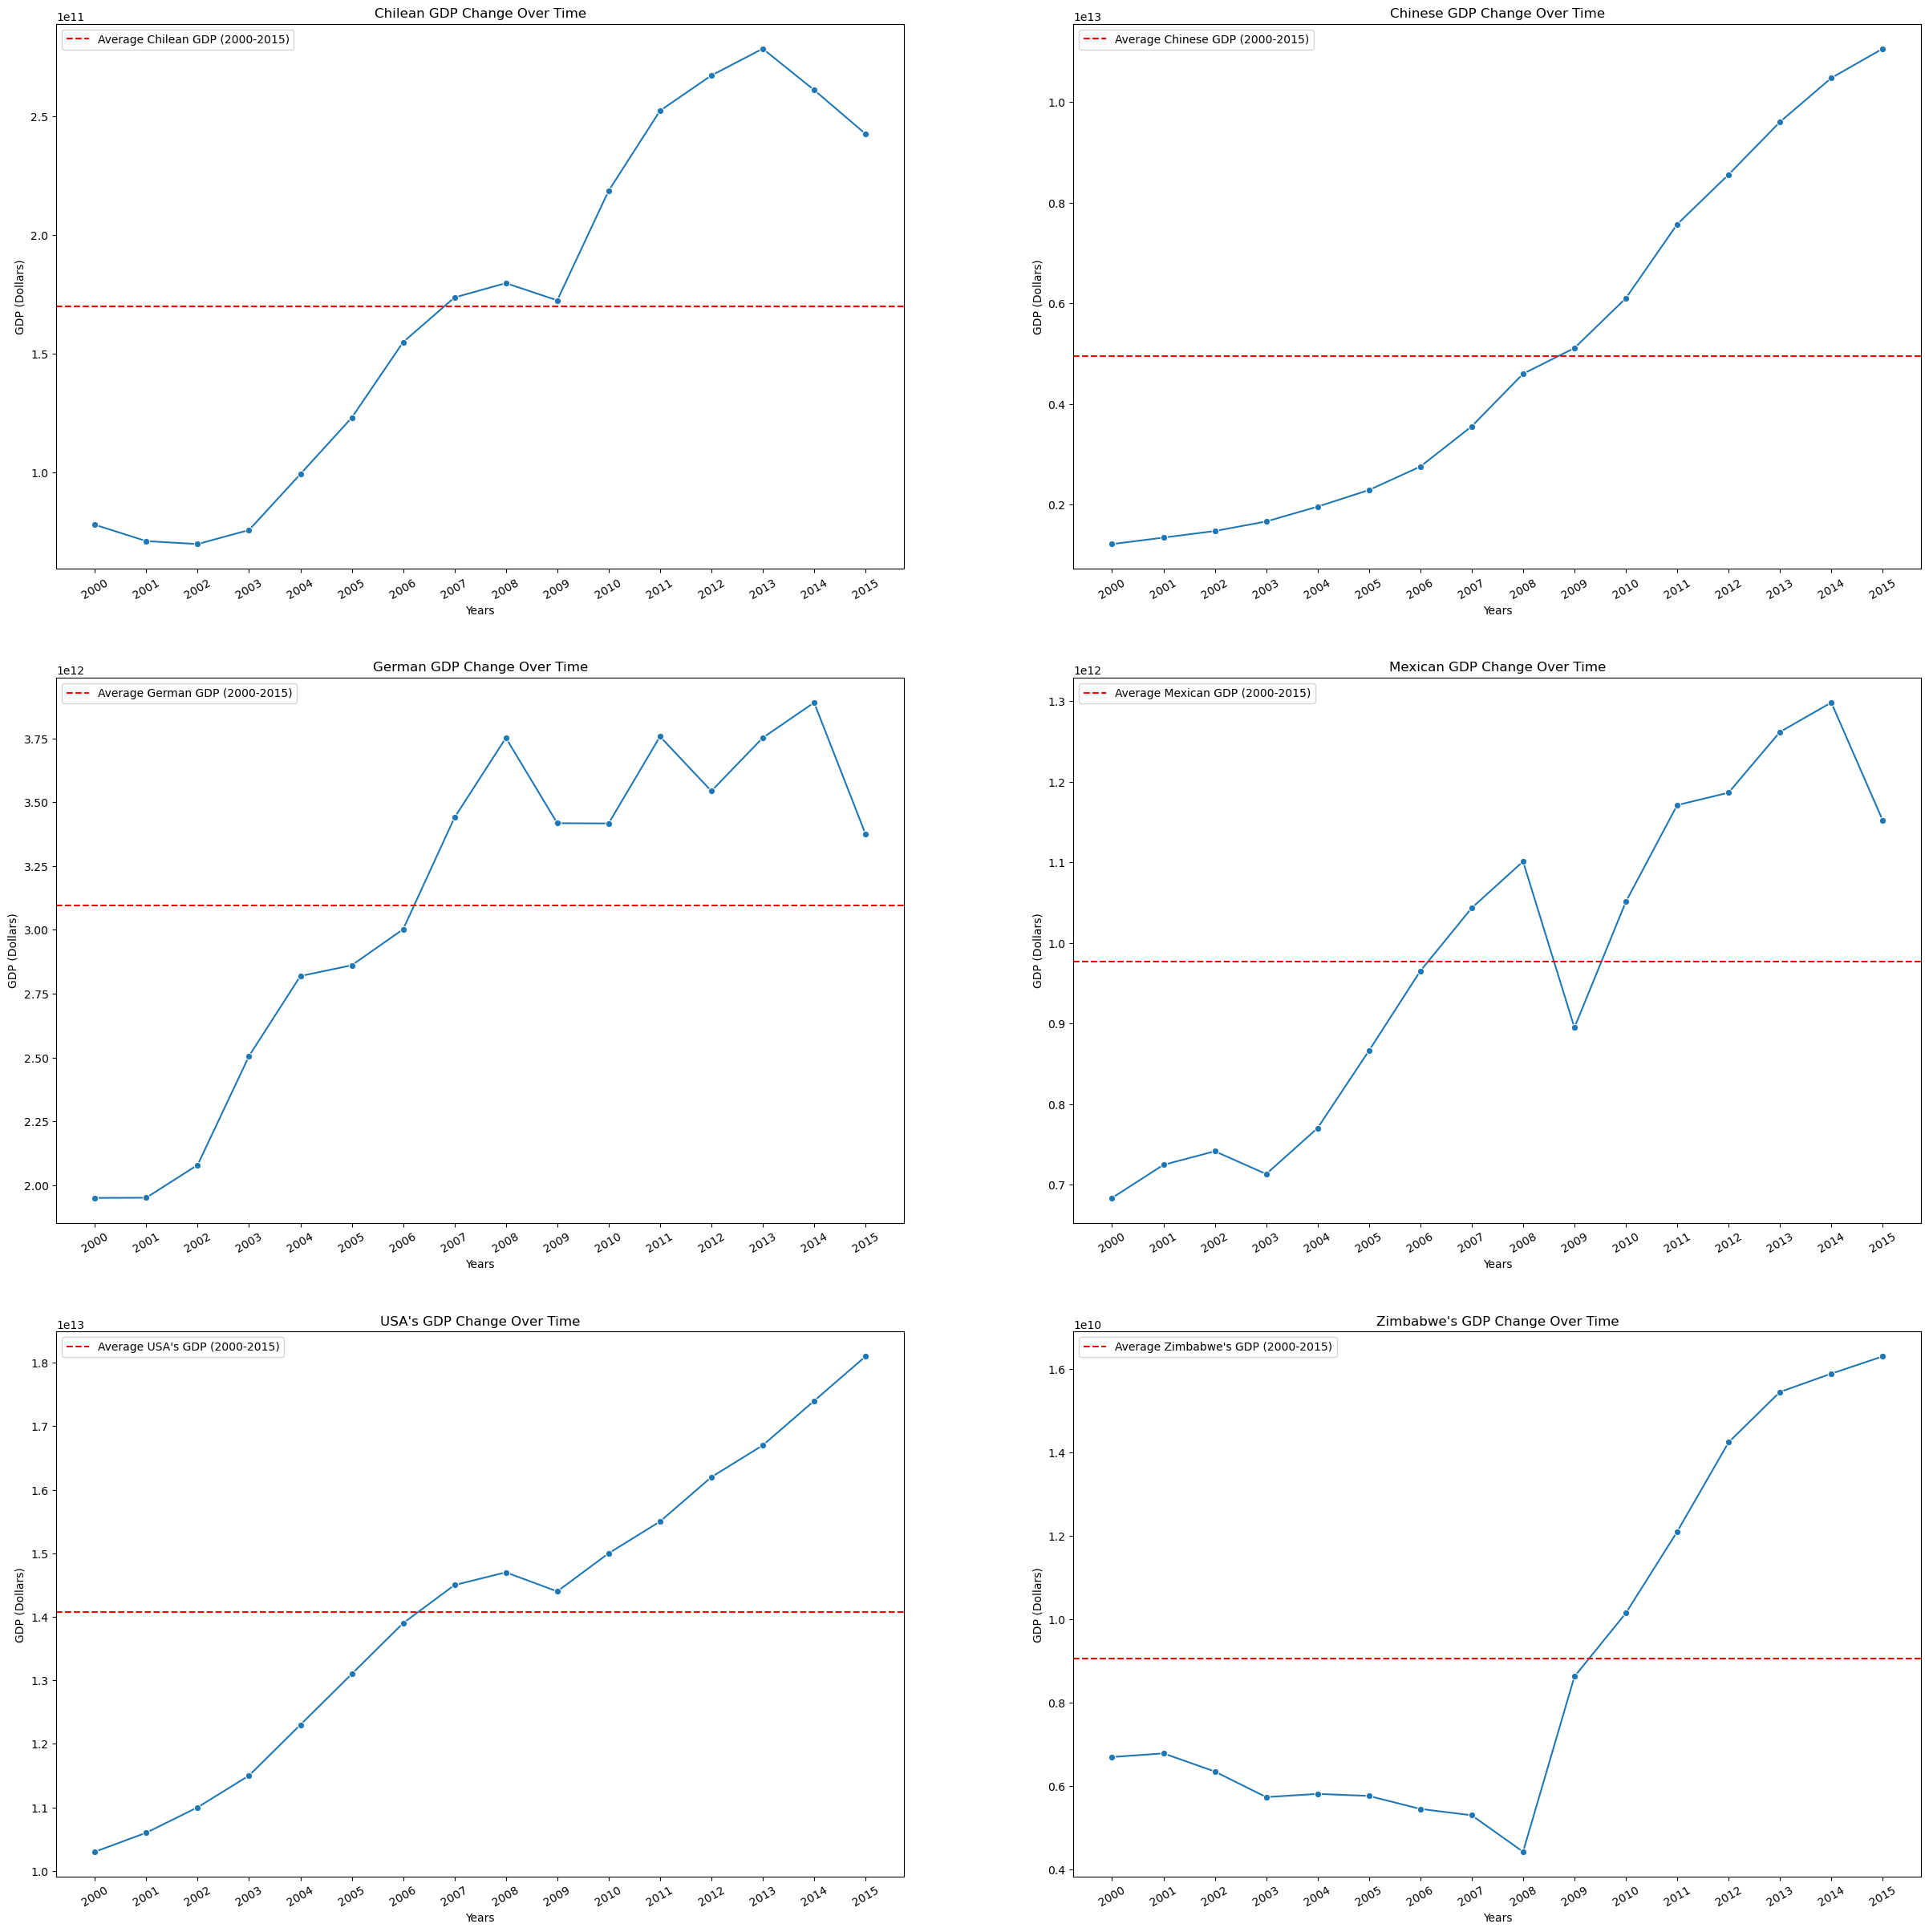

In [7]:
# GDP change over time - separate lineplots

#Create figure
plt.figure(figsize= (30, 30))

# Create subplot 1 : Chilean GDP Change over time

plt.subplot(3, 2, 1)
years = list(range(2000, 2016))
ax = sns.lineplot(data = data_chile, x = "Year", y = "GDP", marker = "o")
ax.set_xticks(years)
ax.set_xticklabels(years, rotation = 30)
plt.axhline(data_chile.GDP.mean(), color = "red", linestyle = "dashed", label = "Average Chilean GDP (2000-2015)")
plt.legend()
plt.xlabel("Years")
plt.ylabel("GDP (Dollars)")
plt.title("Chilean GDP Change Over Time")

# Create subplot 2 : Chinese GDP Change over time

plt.subplot(3, 2, 2)
years = list(range(2000, 2016))
ax2 = sns.lineplot(data = data_china, x = "Year", y = "GDP", marker = "o")
ax2.set_xticks(years)
ax2.set_xticklabels(years, rotation = 30)
plt.axhline(data_china.GDP.mean(), color = "red", linestyle = "dashed", label = "Average Chinese GDP (2000-2015)")
plt.legend()
plt.xlabel("Years")
plt.ylabel("GDP (Dollars)")
plt.title("Chinese GDP Change Over Time")

# Create subplot 3 : German GDP Change over time

plt.subplot(3, 2, 3)
years = list(range(2000, 2016))
ax3 = sns.lineplot(data = data_germany, x = "Year", y = "GDP", marker = "o")
ax3.set_xticks(years)
ax3.set_xticklabels(years, rotation = 30)
plt.axhline(data_germany.GDP.mean(), color = "red", linestyle = "dashed", label = "Average German GDP (2000-2015)")
plt.legend()
plt.xlabel("Years")
plt.ylabel("GDP (Dollars)")
plt.title("German GDP Change Over Time")

# Create subplot 4: Mexican GDP Change over time

plt.subplot(3, 2, 4)
years = list(range(2000, 2016))
ax4 = sns.lineplot(data = data_mexico, x = "Year", y = "GDP", marker = "o")
ax4.set_xticks(years)
ax4.set_xticklabels(years, rotation = 30)
plt.axhline(data_mexico.GDP.mean(), color = "red", linestyle = "dashed", label = "Average Mexican GDP (2000-2015)")
plt.legend()
plt.xlabel("Years")
plt.ylabel("GDP (Dollars)")
plt.title("Mexican GDP Change Over Time")

# Create subplot 5: USA's GDP change over time

plt.subplot(3, 2, 5)
years = list(range(2000, 2016))
ax5 = sns.lineplot(data = data_usa, x = "Year", y = "GDP", marker = "o")
ax5.set_xticks(years)
ax5.set_xticklabels(years, rotation = 30)
plt.axhline(data_usa.GDP.mean(), color = "red", linestyle = "dashed", label = "Average USA's GDP (2000-2015)")
plt.legend()
plt.xlabel("Years")
plt.ylabel("GDP (Dollars)")
plt.title("USA's GDP Change Over Time")

# Create subplot 6: Zimbabwe's GDP change over time

plt.subplot(3, 2, 6)
years = list(range(2000, 2016))
ax6 = sns.lineplot(data = data_zimbabwe, x = "Year", y = "GDP", marker = "o")
ax6.set_xticks(years)
ax6.set_xticklabels(years, rotation = 30)
plt.axhline(data_zimbabwe.GDP.mean(), color = "red", linestyle = "dashed", label = "Average Zimbabwe's GDP (2000-2015)")
plt.legend()
plt.xlabel("Years")
plt.ylabel("GDP (Dollars)")
plt.title("Zimbabwe's GDP Change Over Time")

plt.show()

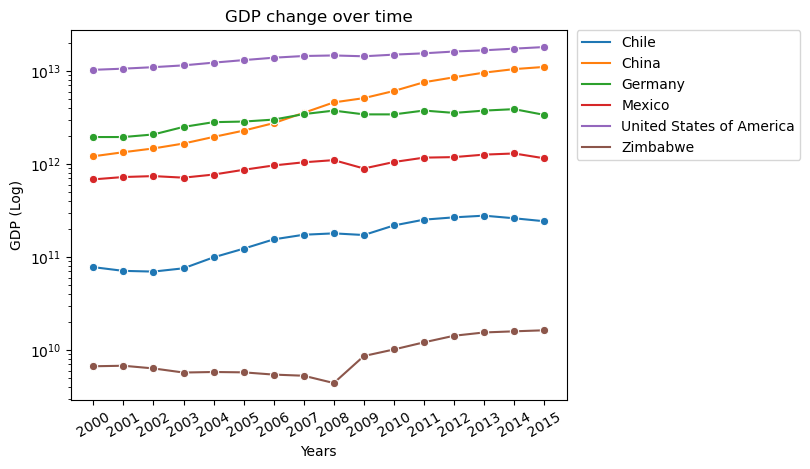

In [8]:
# GDP change over time - same lineplot

axt = sns.lineplot(x = legdp_data["Year"], y = legdp_data["GDP"], hue = legdp_data["Country"], marker="o")
axt.set_yscale("log")
axt.set_xticks(years)
axt.set_xticklabels(labels = years, rotation=30)
plt.xlabel("Years")
plt.ylabel("GDP (Log)")
plt.title("GDP change over time")
plt.legend(bbox_to_anchor=(1.02, 1), borderaxespad=0)
plt.show()


In [9]:
# Separate countries between developed and under-developed

developed_countries_data = legdp_data[(legdp_data["Country"] == "United States of America") |\
                                      (legdp_data["Country"] == "Germany") |\
                                     (legdp_data["Country"] == "China")]

underdeveloped_countries_data = legdp_data[(legdp_data["Country"] == "Chile") |\
                                      (legdp_data["Country"] == "Mexico") |\
                                     (legdp_data["Country"] == "Zimbabwe")]

print(developed_countries_data.head())

   Country  Year  Life expectancy at birth (years)           GDP
16   China  2000                              71.7  1.211350e+12
17   China  2001                              72.2  1.339400e+12
18   China  2002                              72.7  1.470550e+12
19   China  2003                              73.1  1.660290e+12
20   China  2004                              73.5  1.955350e+12


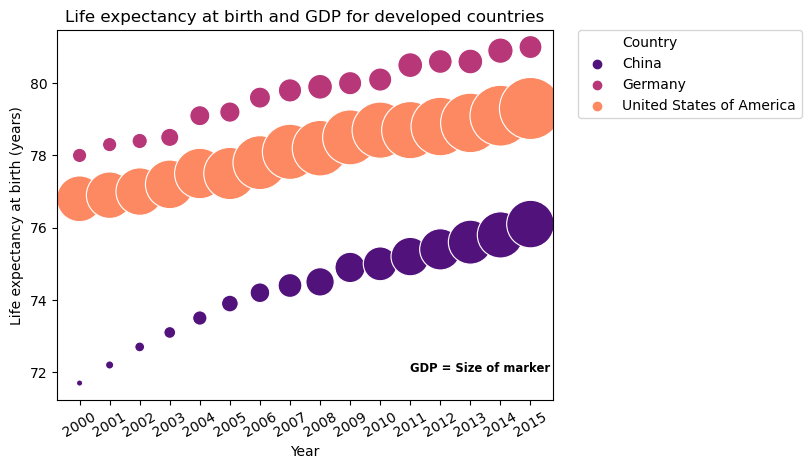

In [10]:
# Life expectancy at birht and GDP for developed countries using Bubble Chart

axb = sns.scatterplot(data=developed_countries_data, x="Year", y="Life expectancy at birth (years)", \
                      size="GDP", sizes=(20, 2000), hue = "Country", palette="magma")
h,l = axb.get_legend_handles_labels()
axb.set_xticks(years)
axb.set_xticklabels(labels = years, rotation=30)
plt.legend(h[0:4],l[0:4],bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.text(2011, 72, "GDP = Size of marker", horizontalalignment='left', size='small', color='black', weight='semibold')
plt.title("Life expectancy at birth and GDP for developed countries")
plt.show()

In [11]:
# Life expectancy change over time - separate lineplots

In [12]:
# Life expectancy change over time - same lineplot

In [13]:
# Life expectancy change over time - separate boxplots

In [14]:
# Life expectancy change over time - same boxplot